In [67]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime


In [56]:
data = pd.read_csv(r"C:\Users\bhumi\OneDrive\Desktop\Time-Series-Forecasting-of-Temperature\Temperature_And_Precipitation_Cities_IN\Bangalore_1990_2022_BangaloreCity.csv", index_col=0)
data

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...
21-07-2022,23.7,20.5,30.8,82.5
22-07-2022,23.2,21.1,27.9,0.0
23-07-2022,23.1,20.9,26.7,0.0


In [57]:
data.shape

(11894, 4)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11894 entries, 01-01-1990 to 25-07-2022
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    11824 non-null  float64
 1   tmin    10505 non-null  float64
 2   tmax    11265 non-null  float64
 3   prcp    7274 non-null   float64
dtypes: float64(4)
memory usage: 464.6+ KB


In [59]:
data.describe()

,tavg,tmin,tmax,prcp
count,11824.000000,10505.000000,11265.000000,7274.000000
mean,23.840426,19.385131,29.932827,4.414119
std,2.309899,2.367239,2.957866,12.994655
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.100000,27.900000,0.000000
50%,23.500000,19.800000,29.500000,0.000000
75%,25.200000,20.800000,32.000000,2.000000
max,32.400000,27.900000,39.200000,271.300000


In [60]:
data.head()

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0


In [61]:
data = data.drop(['tmin', 'tmax', 'prcp'], axis = 1)
data

,tavg
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


In [62]:
data = data.rename(columns={"tavg" : "Temperature"})
data

,Temperature
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


In [63]:
data.isnull().sum()

Temperature    70
dtype: int64

In [64]:
data = data.ffill(axis = 1)
data

,Temperature
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


In [68]:
# Check for infinite values and replace them with NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using the mean of the column
imputer = SimpleImputer(strategy='mean')
data['Temperature'] = imputer.fit_transform(data[['Temperature']])

# Now, you can proceed with the ADF test
result = sm.tsa.adfuller(data['Temperature'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -10.628674384876106
p-value: 5.2833544149151335e-19


In [69]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

print('Results of Dickey Fuller Test:')
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test.
result = sm.tsa.adfuller(data['Temperature'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Results of Dickey Fuller Test:
ADF Statistic: -10.628674384876106
p-value: 5.2833544149151335e-19
Critical Values:
   1%: -3.430901819518007
   5%: -2.8617838756006195
   10%: -2.566899809920393


Results of Dickey Fuller Test:
ADF Statistic: -10.628674384876106
p-value: 5.2833544149151335e-19
Critical Values:
   1%: -3.430901819518007
   5%: -2.8617838756006195
   10%: -2.566899809920393

The test showed that the ADF statistic is -10.63, and the p-value is very close to zero. The ADF statistic helps us know if a time series is stationary. Since our ADF statistic is way lower than the critical values at 1%, 5%, and 10% significance levels, and our p-value is extremely small, we can say our time series is probably stationary.

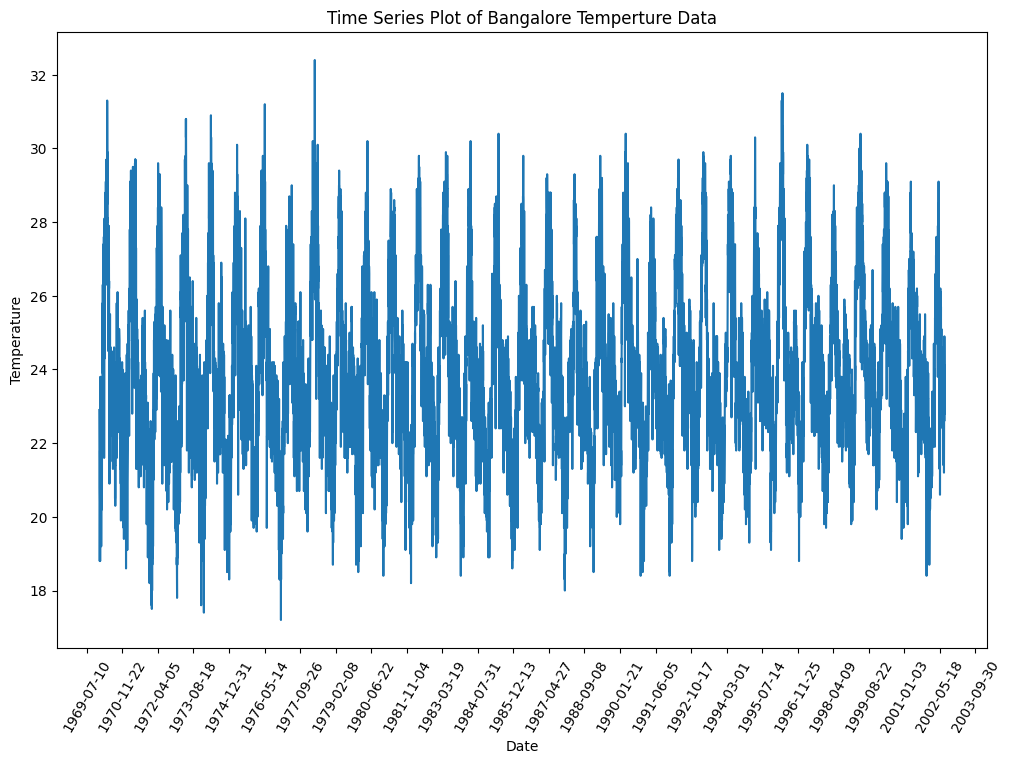

In [70]:
# Create a larger figure
plt.figure(figsize=(12, 8))

# Plot the time series using a line plot
sns.lineplot(x=data.index, y='Temperature', data=data)

# Add titles and labels
plt.title('Time Series Plot of Bangalore Temperture Data')
plt.xlabel('Date')
plt.ylabel('Temperature')

# Customize x-axis date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))  # Adjust the interval as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

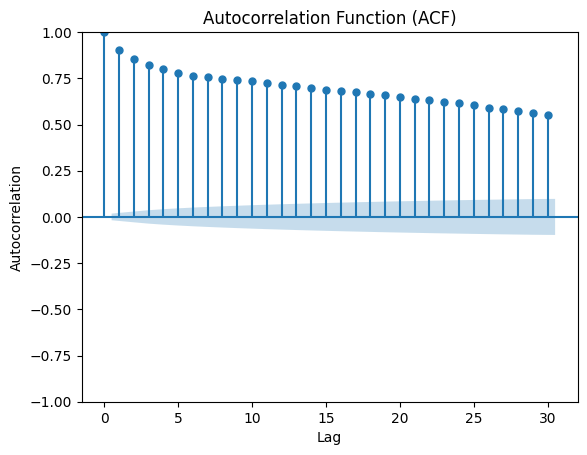

<Figure size 1200x800 with 0 Axes>

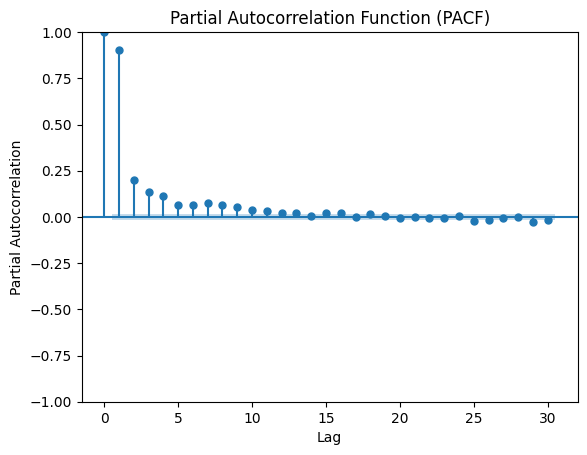

In [71]:
# Plot ACF
plt.figure(figsize=(12, 8))
sm.graphics.tsa.plot_acf(data, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 8))
sm.graphics.tsa.plot_pacf(data, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

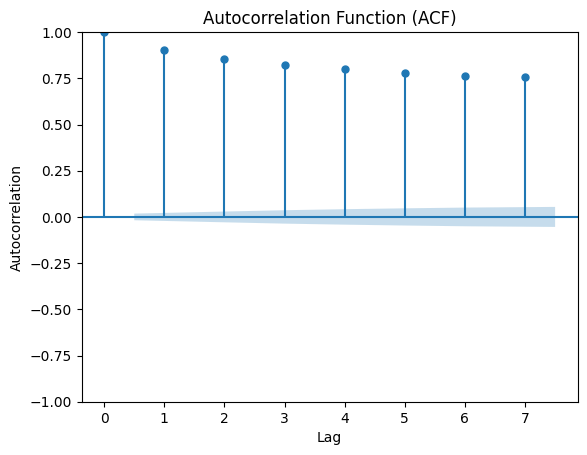

<Figure size 1200x600 with 0 Axes>

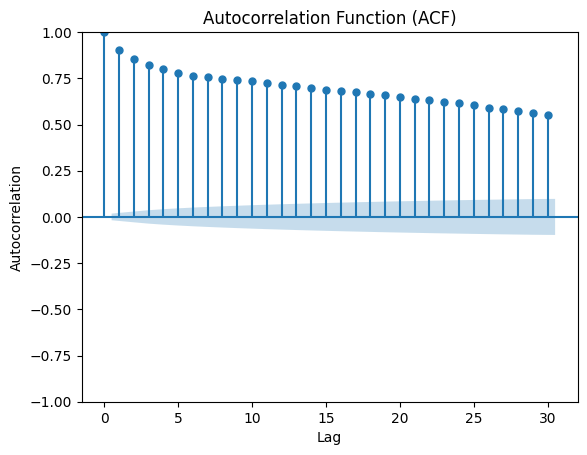

In [72]:
# Plot ACF to detect seasonality (7 days)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data, lags=7)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot ACF to detect seasonality (30 days)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

Based on the autocorrelation plot, there are no significant peaks at any lag, indicating the absence of seasonality in the dataset.

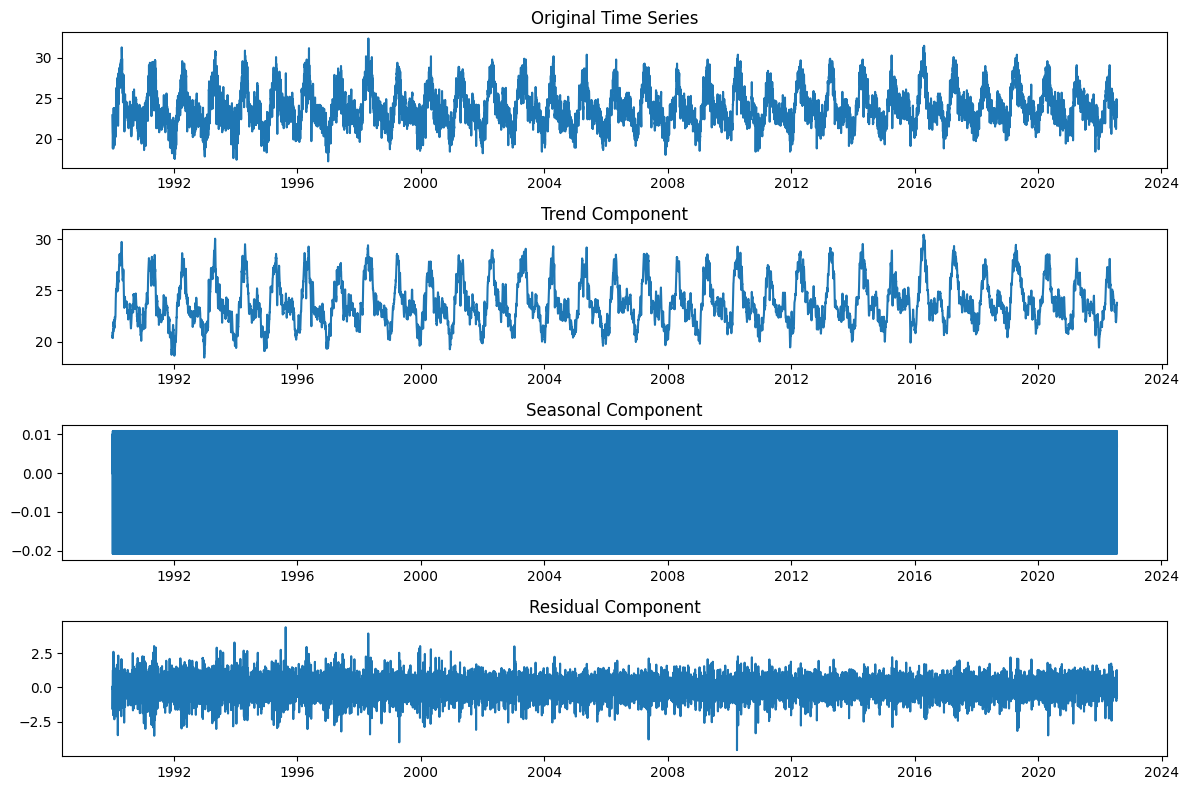

In [77]:
data.index = pd.date_range(start='1990-01-01', periods=len(data), freq='D')


# Decompose the time series using Classical Decomposition
classical_decomposition = sm.tsa.seasonal_decompose(data['Temperature'], model='additive')

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Temperature'])
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(classical_decomposition.trend)
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(classical_decomposition.seasonal)
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(classical_decomposition.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()